<a href="https://colab.research.google.com/github/GhaziFadhlullah/DIF62130_B-_25_2311532012/blob/main/Pratikum1/linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

1.penjelasan:Proses dimulai dengan mengimpor pustaka yang diperlukan. Pandas dan NumPy digunakan untuk manipulasi data, sementara Matplotlib membantu dalam visualisasi. Scikit-learn menyediakan berbagai alat untuk machine learning, seperti normalisasi data dengan MinMaxScaler, transformasi fitur dengan PolynomialFeatures, pembagian data dengan
train_test_split, serta pembuatan model dengan LinearRegression. Dataset yang digunakan diambil dari fetch_california_housing, yang merupakan salah satu kumpulan data yang sering digunakan untuk eksperimen dalam prediksi harga rumah.


In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(data= housing.data, columns=housing.feature_names)
df['MedHouseValue'] = pd.Series(housing.target)

targets=df['MedHouseValue']   #dependent variable
inputs=df.drop(['MedHouseValue'],axis=1)  #independent variable
df.head()                                 #menampilkan 5 data teratas

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


2.penjelasan :Kode ini mengambil dataset *California Housing* dari Scikit-learn, mengonversinya menjadi *DataFrame* menggunakan Pandas, dan menampilkan lima baris pertama.  

- `fetch_california_housing()`: Mengambil dataset harga rumah di California.  
- `pd.DataFrame(data=housing.data, columns=housing.feature_names)`: Membuat *DataFrame* dengan fitur-fitur sebagai kolom.  
- `df["MedHouseValue"] = pd.Series(housing.target)`: Menambahkan kolom target (*MedHouseValue*) yang merepresentasikan harga median rumah.  
- `targets = df["MedHouseValue"]`: Menyimpan variabel target sebagai variabel dependen.  
- `inputs = df.drop(["MedHouseValue"], axis=1)`: Menyimpan fitur lainnya sebagai variabel independen.  
- `df.head()`: Menampilkan lima baris pertama untuk melihat struktur data.  

Outputnya adalah tabel yang berisi fitur seperti `MedInc` (pendapatan median), `HouseAge` (usia rumah), `AveRooms` (jumlah rata-rata kamar), serta `Latitude` dan `Longitude` untuk lokasi.

.

In [ ]:
#df.describe()
#df.info()

print('DataFrame dimension:', df.shape)


DataFrame dimension: (20640, 9)


3.penjelasan : Kode ini bertujuan untuk menampilkan dimensi dari DataFrame yang telah dibuat sebelumnya. Dengan menggunakan df.shape, kode ini mengembalikan jumlah baris dan kolom dalam DataFrame. Pada output yang dihasilkan, yaitu DataFrame dimension: (20640, 9), angka 20640 menunjukkan jumlah baris atau entri dalam dataset, sementara angka 9 menunjukkan jumlah kolom, termasuk variabel independen dan target. Hal ini membantu dalam memahami ukuran dataset sebelum melakukan analisis lebih lanjut.

**DATA PROCESSING**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=1)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)


(14448, 8) (6192, 8)
(14448,) (6192,)


4.penjelasan : Kode ini membagi dataset menjadi data pelatihan dan data pengujian menggunakan fungsi train_test_split dari Scikit-learn. Variabel inputs yang berisi fitur-fitur independen dan targets yang merupakan variabel dependen dipisahkan dengan rasio 70% untuk pelatihan dan 30% untuk pengujian, sebagaimana ditentukan oleh test_size=0.3. Parameter random_state=1 memastikan bahwa pembagian data selalu konsisten setiap kali dijalankan.

Setelah pemisahan, x_train berisi 14448 sampel dengan 8 fitur, sementara x_test berisi 6192 sampel dengan jumlah fitur yang sama. Variabel target y_train memiliki 14448 nilai yang sesuai dengan x_train, sedangkan y_test memiliki 6192 nilai yang sesuai dengan x_test. Hasil ini menunjukkan bahwa dataset telah berhasil dibagi dengan proporsi yang diinginkan, siap digunakan untuk pelatihan dan evaluasi model.

Lakukan data preprocessing pada data training dan testing dengan mentransformasi semua fitur agar nilainya berada pada selang [0,1]

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(x_test)

5.PENJELASAN

**MODELING**

Latih model regresi linier menggunakan semya fitur di data training yang sudah diskalakan.Kemudian tampilkan nilai intercept dan slope variablenya

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(f'intercept: {lr_model.intercept_}')
print(f'coefficients: {lr_model.coef_}')

intercept: -37.28532899875165
coefficients: [ 4.41037995e-01  9.68801816e-03 -1.04781309e-01  6.22052706e-01
 -5.61452681e-06 -3.28792384e-03 -4.23182318e-01 -4.37898856e-01]


6.penjelasan : Kode pertama membuat model regresi linear menggunakan LinearRegression() dari Scikit-learn dan melatihnya dengan data pelatihan x_train dan y_train. Model ini akan mempelajari hubungan antara fitur-fitur dalam x_train dan variabel target y_train untuk membentuk persamaan regresi yang dapat digunakan dalam prediksi.

Kode kedua mencetak nilai intercept dan coefficients dari model yang telah dilatih. Intercept adalah nilai konstanta dalam persamaan regresi yang mewakili nilai prediksi ketika semua fitur bernilai nol. Sementara itu, coefficients adalah bobot yang dikalikan dengan masing-masing fitur dalam persamaan regresi, menunjukkan seberapa besar pengaruh setiap fitur terhadap harga rumah.

Hasil output menunjukkan bahwa intercept dari model adalah -37.2853, yang berarti jika semua fitur bernilai nol, model akan memprediksi harga rumah sebesar nilai ini. Coefficients yang ditampilkan dalam bentuk array menunjukkan bobot masing-masing fitur, yang menentukan seberapa besar perubahan dalam harga rumah untuk setiap kenaikan satu unit dalam fitur tersebut. Nilai positif pada suatu koefisien menunjukkan bahwa fitur tersebut berbanding lurus dengan harga rumah, sedangkan nilai negatif menunjukkan hubungan terbalik.









**Model Evaluation**

evaluasi model yang telah dilatih menggunakan data testing dengan menghitung MSE dan R2 serta plot hubungan antara target output dan hasil prediksinya

In [ ]:
y_pred=lr_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=lr_model.score(x_test,y_test)
print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 0.5296293151408235
R2: 0.5971429737359628


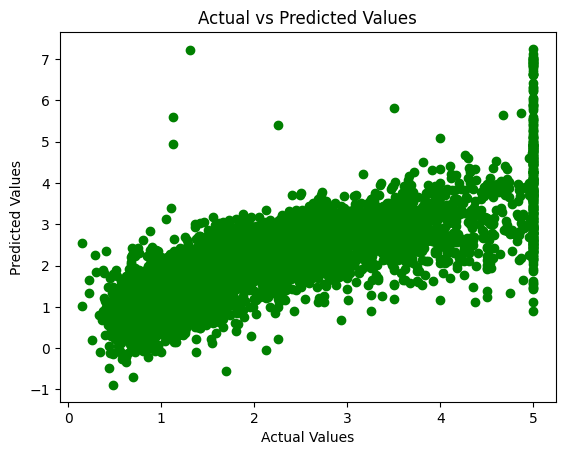

In [ ]:
plt.scatter(y_test, y_pred, color='green' )
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

7.penjelasan : Kode pertama melakukan prediksi menggunakan model regresi linear yang telah dilatih. Variabel y_pred menyimpan hasil prediksi berdasarkan data uji x_test. Fungsi mean_squared_error menghitung rata-rata kuadrat selisih antara nilai aktual y_test dan prediksi y_pred, menghasilkan nilai MSE sebesar 0.5296 yang menunjukkan seberapa baik model memprediksi data. Metode score pada model menghitung koefisien determinasi R² sebesar 0.5971 yang menunjukkan proporsi variabilitas data yang dapat dijelaskan oleh model.

Kode kedua membuat scatter plot untuk membandingkan nilai aktual dan prediksi. Sumbu x merepresentasikan nilai aktual y_test, sedangkan sumbu y menunjukkan nilai prediksi y_pred. Plot dengan titik-titik hijau menggambarkan distribusi antara kedua nilai tersebut. Semakin mendekati garis diagonal, semakin baik akurasi model dalam memprediksi. Terlihat bahwa sebagian besar titik membentuk pola linear